In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# add new columns
def process_data(data):
    new_df = df.groupby(["iter"])['mA'].median().reset_index()
    new_df = new_df.rename(columns={'mA': 'Median Current Value'})
    new_df = new_df.cut()
    return new_df

0
2
4
6


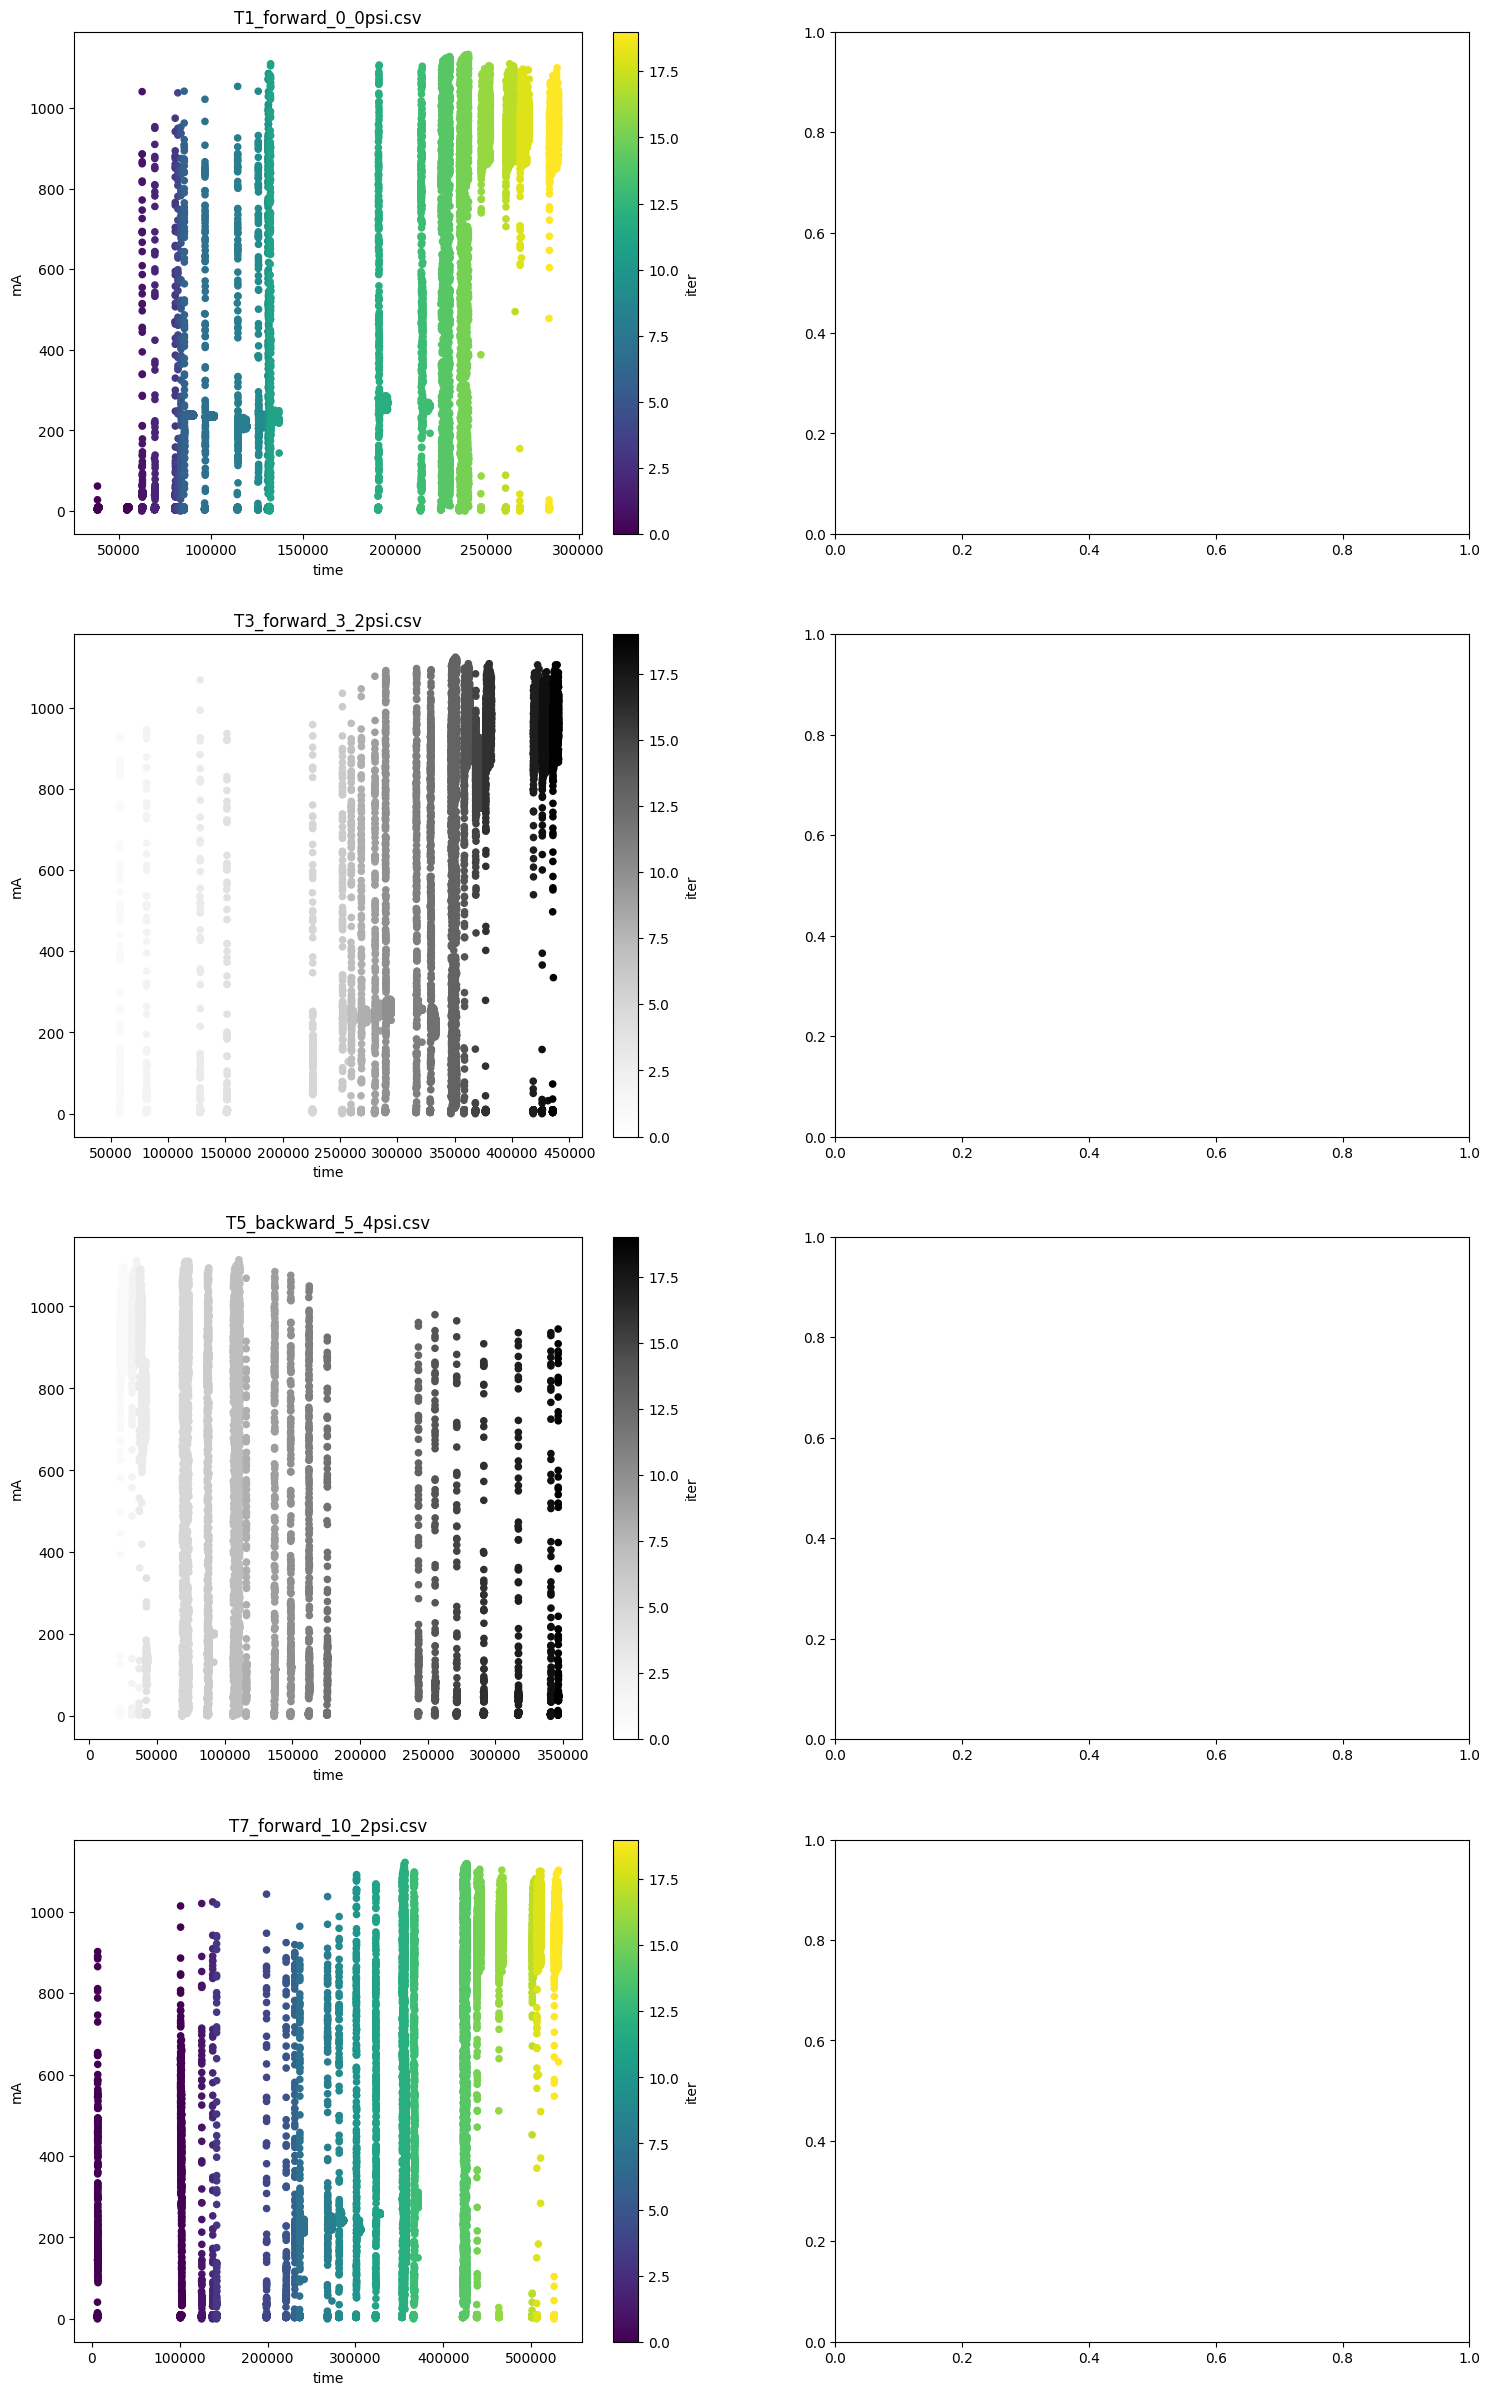

In [66]:

# set up grid, one graph per test
file_names = ["T1_forward_0_0psi.csv",
              "T2_backward_0_0psi.csv",
              "T3_forward_3_2psi.csv",
              "T4_backward_3_3psi.csv",
              "T5_backward_5_4psi.csv",
              "T6_forward_5_4psi.csv",
              "T7_forward_10_2psi.csv",
              "T8_backward_10_2psi.csv",]

nrow, ncol = 4, 2
fig, ax = plt.subplots(nrow, ncol)

# read in and process data from each test
for i in range(nrow):
    for j in range(ncol):
        idx = (i*ncol) + j
        this_ax = ax[i,j]
        print(idx)
        file_name = file_names[idx]
        df = pd.read_csv(file_name, skiprows=1, names=["time", "measurement", "mA", "iter"])
        df = df[df['mA'] <= 1200] # toss the garbage values
        new = process_data(df)
        df.plot(x="time", y="mA", kind="scatter", ax=this_ax, c="iter")
        # new.plot(x="iter", y="Median Current Value", kind="bar", ax=this_ax)
        this_ax.title.set_text(file_name)
        break

fig.set_size_inches(18, 30, forward=True)
plt.show()